<a href="https://colab.research.google.com/github/Manikranthi/Innomatics_Internship/blob/main/Analytics_vidya_Jobathon_(6)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
#Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
train=pd.read_csv('/content/drive/MyDrive/batch45/train_Df64byy.csv')
train

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [157]:
test=pd.read_csv('/content/drive/MyDrive/batch45/test_YCcRUnU.csv')
test
id_list=list(test['ID'])
test=test.drop('ID',axis=1)

In [ ]:
train=train.drop('ID',axis=1)


In [75]:
train

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [158]:
test

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,C12,2470,Owned,Individual,74,74,No,X3,NaN,NaN,1,17836.0
21803,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [ ]:
train.shape

(50882, 13)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB


In [ ]:
((train.isnull().sum())/len(train))*100

City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [ ]:
train

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


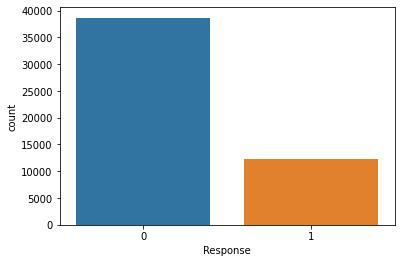

In [ ]:
sns.countplot(train.Response)
plt.show()

In [ ]:
((train.Response.value_counts())/len(train))*100

0    76.005267
1    23.994733
Name: Response, dtype: float64

## Observations:

- The dataset is highly imbalanced.

In [ ]:
train.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


## City_Code

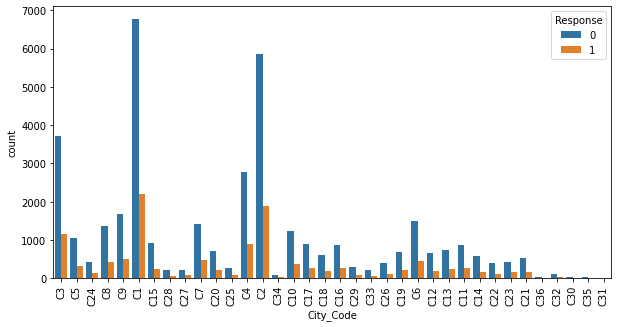

In [ ]:
plt.figure(figsize=(10,5))
g=sns.countplot(x=train.City_Code,hue=train.Response)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

## Observations:

- We can see that Cities C1,C2,C3,C4 have more people who reject the insurance offer.

- Out of them C1 has the highest rate of rejection of the offer followed by C2

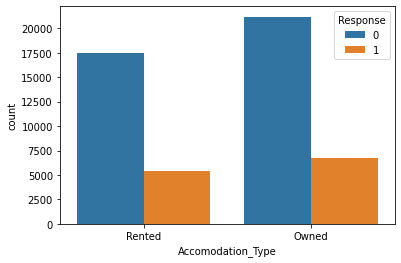

In [ ]:
sns.countplot(x=train.Accomodation_Type,hue=train.Response)

In [ ]:
train.groupby(by='Accomodation_Type').sum()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Accomodation_Type,,,,,,,
Owned,48104930,1437456,1356564,48274.0,426025,4.549348e+08,6763
Rented,40062825,844921,818075,26442.0,343066,2.667730e+08,5446


## Observations:

- We can see that the people who have their own houses are more likely to reject the insurance offer compared to those staying in an rented house.

- The people who stay in owned house have a slight advantage of accepting the loan compared to the those in rented house.

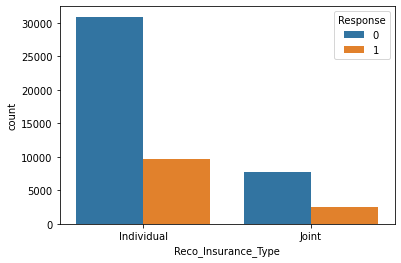

In [ ]:
sns.countplot(x=train.Reco_Insurance_Type,hue=train.Response)

##Feature Transformations

In [79]:
l1=[]
for i in train['City_Code']:
  l1.append(int(i.lstrip('C')))
train['City_Code']=l1

In [11]:
train

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [ ]:
train.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [80]:
train['Accomodation_Type']=train['Accomodation_Type'].map({'Rented':1,'Owned':2})

In [81]:
train['Reco_Insurance_Type']=train['Reco_Insurance_Type'].map({'Induvidual':1,'Joint':2})

In [82]:
train['Is_Spouse']=train['Is_Spouse'].map({'Yes':1,'No':0})

In [85]:
l3=[]
for i in train['Health Indicator']:
  if type(i)==float:
    l3.append(i)
  else:
    l3.append(int(i.lstrip('X')))
train['Health Indicator']=l3

In [86]:
l4=[]
for i in train['Holding_Policy_Duration']:
  if type(i)==float:
    l4.append(i)
  elif(i=='14+'):
    l4.append(15.0)
  else:
    l4.append(float(i))
train['Holding_Policy_Duration']=l4


In [87]:
df=train.drop('Response',axis=1)

In [88]:
sc=StandardScaler()

In [89]:
df_scaled=sc.fit_transform(df)

In [90]:
Y=train['Response']

In [91]:
from sklearn.impute import KNNImputer

In [92]:
knn_imputer = KNNImputer()

In [93]:
df_scal = knn_imputer.fit_transform(df_scaled)

In [24]:
df_scal

array([[-0.65186279,  1.03942484, -1.10404602, ...,  0.54661115,
         1.08582966, -0.38785222],
       [-0.39822795, -0.43241534,  0.90575934, ...,  0.35166155,
         1.08582966,  2.47739376],
       [-0.39822795,  1.40387381,  0.90575934, ..., -1.40288481,
         0.61268834, -1.02184214],
       ...,
       [-0.90549764, -0.90640968, -1.10404602, ..., -1.40288481,
        -0.49130806, -0.42639541],
       [-0.90549764, -1.21397933,  0.90575934, ..., -0.42813683,
         0.13954703,  2.1237069 ],
       [-0.65186279,  1.49797047, -1.10404602, ...,  0.54661115,
         0.45497457, -0.41880817]])

In [94]:
df_scal=pd.DataFrame(df_scal)

In [95]:
df_scal

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.651863,1.039425,-1.104046,0.0,-0.511625,-0.389098,-0.445367,-0.999910,1.858309,0.546611,1.085830,-0.387852
1,-0.398228,-0.432415,0.905759,0.0,1.741395,-1.197449,-0.445367,-0.307784,-0.032943,0.351662,1.085830,2.477394
2,-0.398228,1.403874,0.905759,0.0,-0.742704,-0.620055,-0.445367,-0.169359,-1.083639,-1.402885,0.612688,-1.021842
3,2.011303,1.857504,0.905759,0.0,0.412691,0.303775,-0.445367,-0.999910,1.858309,0.546611,0.612688,0.545682
4,-0.017776,0.321060,-1.104046,0.0,-0.049467,0.072817,-0.445367,-0.307784,-0.663361,-1.402885,0.139547,-0.573588
...,...,...,...,...,...,...,...,...,...,...,...,...
50877,-0.525045,-0.623418,-1.104046,0.0,-1.320401,-1.197449,-0.445367,0.384342,-0.747416,0.546611,0.454975,-0.983299
50878,-0.398228,1.724083,-1.104046,0.0,-1.031552,-0.908752,-0.445367,0.384342,0.177196,0.546611,-1.753018,-1.331705
50879,-0.905498,-0.906410,-1.104046,0.0,1.048158,1.169865,-0.445367,-0.307784,1.858309,-1.402885,-0.491308,-0.426395
50880,-0.905498,-1.213979,0.905759,0.0,1.510316,0.361514,-0.445367,-0.307784,-0.873500,-0.428137,0.139547,2.123707


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


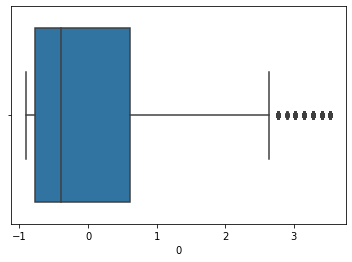

In [27]:
sns.boxplot(df_scal[0])

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from xgboost import XGBClassifier

In [97]:
rf=RandomForestClassifier()

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(df_scal,Y,random_state=100)

In [99]:
raf=rf.fit(X_train,Y_train)

In [100]:
Y_pred=raf.predict(X_test)

In [101]:
accuracy_score(Y_test,Y_pred)

0.7527710085685088

In [102]:
dt=DecisionTreeClassifier()

In [103]:
dat=dt.fit(X_train,Y_train)

In [104]:
Y_dt_pred=dat.predict(X_test)

In [105]:
accuracy_score(Y_test,Y_dt_pred)

0.66174042921154

In [106]:
xgboost=XGBClassifier()

In [107]:
xgb=xgboost.fit(X_train,Y_train)

In [108]:
Y_xgb_pred=xgb.predict(X_test)

In [109]:
accuracy_score(Y_test,Y_xgb_pred)

0.7546576527002594

In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
sm=SMOTE(k_neighbors=10)

In [112]:
X_res,Y_res=sm.fit_sample(df_scal,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [113]:
X_res.shape,Y_res.shape

((77346, 12), (77346,))

In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=100)

In [115]:
rf1=RandomForestClassifier()
rf1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
Y_rf_pred=rf1.predict(X_test)

In [117]:
accuracy_score(Y_test,Y_rf_pred)

0.8386485088777796

In [118]:
roc_auc_score(Y_test,Y_rf_pred)

0.8382941344859369

In [119]:
{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [120]:
rf2=RandomForestClassifier(min_samples_leaf=2,min_samples_split=10,max_features='sqrt',max_depth=10,bootstrap=True)
rf2.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
Y_rf1_pred=rf2.predict(X_test)

In [122]:
accuracy_score(Y_test,Y_rf1_pred)

0.7226771246336838

In [123]:
roc_auc_score(Y_test,Y_rf1_pred)

0.7227873817680406

In [124]:
dt1=DecisionTreeClassifier()

In [125]:
dat1=dt1.fit(X_train,Y_train)

In [126]:
Y_dt_pred=dat1.predict(X_test)

In [127]:
accuracy_score(Y_test,Y_dt_pred)

0.7526288570936045

In [128]:
xgboost1=XGBClassifier()

In [129]:
xgboost12=xgboost1.fit(X_train,Y_train)

In [130]:
xgboost_dt_pred=xgboost12.predict(X_test)

In [131]:
accuracy_score(Y_test,xgboost_dt_pred)

0.7999913807964144

In [132]:
roc_auc_score(Y_test,xgboost_dt_pred)

0.7994895162023893

In [66]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [67]:
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
    }

In [68]:
gsearch=RandomizedSearchCV(xgboost12,param_distributions=param_tuning,cv=10)

In [69]:
gsearch.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
gsearch.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 500,
 'subsample': 0.7}

In [133]:
xgb_opti=XGBClassifier(max_depth=10,min_child_weight=3,subsample=0.7,colsample_bytree=0.7)

In [134]:
xgb_opti.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [135]:
opti_pred=xgb_opti.predict(X_test)

In [136]:
accuracy_score(Y_test,opti_pred)

0.8371832442682297

In [137]:
roc_auc_score(Y_test,opti_pred)

0.8366578886519577

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [ ]:
def layer_2_nn():

  model=Sequential([
                    layers.Dense(units=10,activation='relu',input_shape=(12,)),
                    layers.BatchNormalization(momentum=0.99, epsilon=0.001),
                    layers.Dense(units=1,activation='sigmoid')
  ])
  #Loss and Optimizer
  loss=tf.keras.losses.categorical_crossentropy #log-loss
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
  return model

In [ ]:
model_layer=layer_2_nn()
model_layer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                130       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 181
Trainable params: 161
Non-trainable params: 20
_________________________________________________________________


In [ ]:
history=model_layer.fit(x=X_train,y=Y_train,batch_size=300,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
181/181 [==============================] - 3s 5ms/step - loss: 0.0000e+00 - accuracy: 0.5036 - val_loss: 0.0000e+00 - val_accuracy: 0.5365
Epoch 2/100
181/181 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5003 - val_loss: 0.0000e+00 - val_accuracy: 0.5242
Epoch 3/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5028 - val_loss: 0.0000e+00 - val_accuracy: 0.5184
Epoch 4/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.5020 - val_loss: 0.0000e+00 - val_accuracy: 0.5138
Epoch 5/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4978 - val_loss: 0.0000e+00 - val_accuracy: 0.5064
Epoch 6/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4993 - val_loss: 0.0000e+00 - val_accuracy: 0.5051
Epoch 7/100
181/181 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accura

In [159]:
l1=[]
for i in test['City_Code']:
  l1.append(int(i.lstrip('C')))
test['City_Code']=l1

In [160]:
test['Accomodation_Type']=list(map(lambda x:x.replace('Owned','1'),test['Accomodation_Type']))
test['Accomodation_Type']=list(map(lambda x:x.replace('Rented','0'),test['Accomodation_Type']))
test['Accomodation_Type']=list(map(lambda x: int(x),test['Accomodation_Type']))

In [161]:
test['Reco_Insurance_Type']=list(map(lambda x:x.replace('Individual','1'),test['Reco_Insurance_Type']))
test['Reco_Insurance_Type']=list(map(lambda x:x.replace('Joint','0'),test['Reco_Insurance_Type']))
test['Reco_Insurance_Type']=list(map(lambda x: int(x),test['Reco_Insurance_Type']))

In [162]:
test['Is_Spouse']=list(map(lambda x:x.replace('Yes','1'),test['Is_Spouse']))
test['Is_Spouse']=list(map(lambda x:x.replace('No','0'),test['Is_Spouse']))
test['Is_Spouse']=list(map(lambda x: int(x),test['Is_Spouse']))

In [163]:
l=[]
for i in test['Holding_Policy_Duration']:
  if type(i)==float:
    l.append(i)
  elif (i=='14+'):
    l.append(15.0)
  else:
     l.append(float(i))
test['Holding_Policy_Duration']=l

In [164]:
l6=[]
for i in test['Health Indicator']:
  if type(i)==float:
    l6.append(i)
  else:
     l6.append(int(i.lstrip('X')))
test['Health Indicator']=l6

In [165]:
test

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,156,1,1,30,30,0,NaN,6.0,3.0,5,11934.0
1,4,7,1,0,69,68,1,1.0,3.0,3.0,18,32204.8
2,1,564,0,1,28,28,0,3.0,2.0,4.0,17,9240.0
3,3,1177,0,1,23,23,0,3.0,3.0,3.0,18,9086.0
4,1,951,1,1,75,75,0,3.0,NaN,NaN,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,3,1044,1,1,45,45,0,1.0,4.0,1.0,18,15884.0
21801,4,266,1,1,59,59,0,5.0,6.0,3.0,18,21390.0
21802,12,2470,1,1,74,74,0,3.0,NaN,NaN,1,17836.0
21803,10,1676,0,1,25,25,0,4.0,3.0,1.0,19,11568.0


In [146]:
X_train

array([[-0.71746828,  0.13845603,  0.90575934, ...,  0.07612208,
        -0.80127166, -0.41573407],
       [-0.90549764, -1.09811405, -1.10404602, ...,  1.52135913,
         0.45497457, -0.67373949],
       [-0.77868022,  0.36810842,  0.90575934, ...,  0.15671196,
         0.2972608 ,  0.05463572],
       ...,
       [-0.90549764, -0.90876101,  0.90575934, ..., -1.40288481,
         1.08582966, -0.20464507],
       [-0.05159438,  0.54039629,  0.90575934, ..., -1.24367569,
         0.64160231,  0.39966697],
       [ 1.37721599, -0.91975174, -1.10404602, ...,  1.52135913,
         0.61268834,  0.3253485 ]])

In [166]:
hackthon_test_data = knn_imputer.fit_transform(test)

In [167]:
hackthon_test_data

array([[1.00000e+00, 1.56000e+02, 1.00000e+00, ..., 3.00000e+00,
        5.00000e+00, 1.19340e+04],
       [4.00000e+00, 7.00000e+00, 1.00000e+00, ..., 3.00000e+00,
        1.80000e+01, 3.22048e+04],
       [1.00000e+00, 5.64000e+02, 0.00000e+00, ..., 4.00000e+00,
        1.70000e+01, 9.24000e+03],
       ...,
       [1.20000e+01, 2.47000e+03, 1.00000e+00, ..., 2.20000e+00,
        1.00000e+00, 1.78360e+04],
       [1.00000e+01, 1.67600e+03, 0.00000e+00, ..., 1.00000e+00,
        1.90000e+01, 1.15680e+04],
       [2.00000e+00, 3.61700e+03, 1.00000e+00, ..., 2.00000e+00,
        3.00000e+00, 2.30400e+04]])

In [182]:
df1=pd.DataFrame(hackthon_test_data)

In [169]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,156.0,1.0,1.0,30.0,30.0,0.0,2.8,6.0,3.0,5.0,11934.0
1,4.0,7.0,1.0,0.0,69.0,68.0,1.0,1.0,3.0,3.0,18.0,32204.8
2,1.0,564.0,0.0,1.0,28.0,28.0,0.0,3.0,2.0,4.0,17.0,9240.0
3,3.0,1177.0,0.0,1.0,23.0,23.0,0.0,3.0,3.0,3.0,18.0,9086.0
4,1.0,951.0,1.0,1.0,75.0,75.0,0.0,3.0,9.4,3.0,5.0,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21800,3.0,1044.0,1.0,1.0,45.0,45.0,0.0,1.0,4.0,1.0,18.0,15884.0
21801,4.0,266.0,1.0,1.0,59.0,59.0,0.0,5.0,6.0,3.0,18.0,21390.0
21802,12.0,2470.0,1.0,1.0,74.0,74.0,0.0,3.0,10.4,2.2,1.0,17836.0
21803,10.0,1676.0,0.0,1.0,25.0,25.0,0.0,4.0,3.0,1.0,19.0,11568.0


In [173]:
sub_df=pd.read_csv('/content/drive/MyDrive/batch45/sample_submission_QrCyCoT.csv')

In [179]:
sub_df

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0


In [ ]:
sub_df['Response']=pred

In [175]:
df2=df1

In [176]:
df2=df2.insert(0,'ID',id_list)


In [178]:
df1

,ID,0,1,2,3,4,5,6,7,8,9,10,11
0,50883,1.0,156.0,1.0,1.0,30.0,30.0,0.0,2.8,6.0,3.0,5.0,11934.0
1,50884,4.0,7.0,1.0,0.0,69.0,68.0,1.0,1.0,3.0,3.0,18.0,32204.8
2,50885,1.0,564.0,0.0,1.0,28.0,28.0,0.0,3.0,2.0,4.0,17.0,9240.0
3,50886,3.0,1177.0,0.0,1.0,23.0,23.0,0.0,3.0,3.0,3.0,18.0,9086.0
4,50887,1.0,951.0,1.0,1.0,75.0,75.0,0.0,3.0,9.4,3.0,5.0,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,3.0,1044.0,1.0,1.0,45.0,45.0,0.0,1.0,4.0,1.0,18.0,15884.0
21801,72684,4.0,266.0,1.0,1.0,59.0,59.0,0.0,5.0,6.0,3.0,18.0,21390.0
21802,72685,12.0,2470.0,1.0,1.0,74.0,74.0,0.0,3.0,10.4,2.2,1.0,17836.0
21803,72686,10.0,1676.0,0.0,1.0,25.0,25.0,0.0,4.0,3.0,1.0,19.0,11568.0


In [184]:
k=sub_df['Response']
y_pred=xgboost12.predict(df1,k)

ValueError: ignored

In [181]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        21805 non-null  int64
 1   Response  21805 non-null  int64
dtypes: int64(2)
memory usage: 340.8 KB
